In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models, Sequential
from keras.preprocessing import image
from tensorflow.keras.layers import Input, SeparableConv2D,  MaxPooling2D, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization, Add, AveragePooling2D
from tensorflow.keras.layers import ReLU, Flatten, Dense,Dropout
from tensorflow.keras import Model
from keras.utils.vis_utils import plot_model


from google.colab import files
import os

In [2]:
!git clone https://github.com/ayyucedemirbas/COVID-19_CT_Scan_Classification

Cloning into 'COVID-19_CT_Scan_Classification'...
remote: Enumerating objects: 2628, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 2628 (delta 51), reused 120 (delta 40), pack-reused 2488
Receiving objects: 100% (2628/2628), 246.97 MiB | 27.42 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Checking out files: 100% (2488/2488), done.


In [3]:
train_path = '/content/dataset/train'
test_path = '/content/dataset/test'
#
batch_size=48
img_height = 240
img_width = 240

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
 
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  
  batch_size=batch_size)


Found 1971 files belonging to 2 classes.
Using 1577 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path, 
  #color_mode='grayscale',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1971 files belonging to 2 classes.
Using 394 files for validation.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 510 files belonging to 2 classes.


In [ ]:

seed = 19
np.random.seed(seed)
tf.random.set_seed(seed)


inputs = []
outputs = []
paths_no = []
# images that have no tumor
for r, d, f in os.walk(r'/content/dataset/train/non-COVID'):
    for file in f:
        if '.png' in file:
            paths_no.append(os.path.join(r, file))


for path in paths_no:
  img = PIL.Image.open(path).convert('RGB')
  img = img.resize((255,255))
  
  img = np.array(img)
  
  inputs.append(np.array(img))
  outputs.append(0)
print(len(paths_no))
#images that have tumor
paths_yes = []
for r, d, f in os.walk(r'/content/dataset/train/COVID'):
    for file in f:
        if '.png' in file:
            paths_yes.append(os.path.join(r, file))
print(len(paths_yes))
for path in paths_yes:
  
  img = PIL.Image.open(path).convert('RGB')
  img = img.resize((255,255))
  
  img = np.array(img)
   #not every image has 3 channels in out dataset
  inputs.append(np.array(img))
  outputs.append(1)

inputs = np.array(inputs)
outputs = np.array(outputs)
outputs = outputs.reshape(1971,1)
#

# rescaling input images
inputs = inputs/255
#
print(inputs.shape)
print(outputs.shape)
#train test val splitting
input_train, input_test, output_train ,output_test = train_test_split(inputs, outputs, test_size=0.3, shuffle=True, random_state=7)
# splitting done here

print(len(input_train))
print(input_train.shape)
print(len(output_train))
print(output_train.shape)


974
997
(1971, 255, 255, 3)
(1971, 1)
1379
(1379, 255, 255, 3)
1379
(1379, 1)


Model: "model_41"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_56 (InputLayer)          [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_55 (Rescaling)       (None, 240, 240, 3)  0           ['input_56[0][0]']               
                                                                                                  
 conv2d_356 (Conv2D)            (None, 240, 240, 12  3584        ['rescaling_55[0][0]']           
                                8)                                                                
                                                                                           

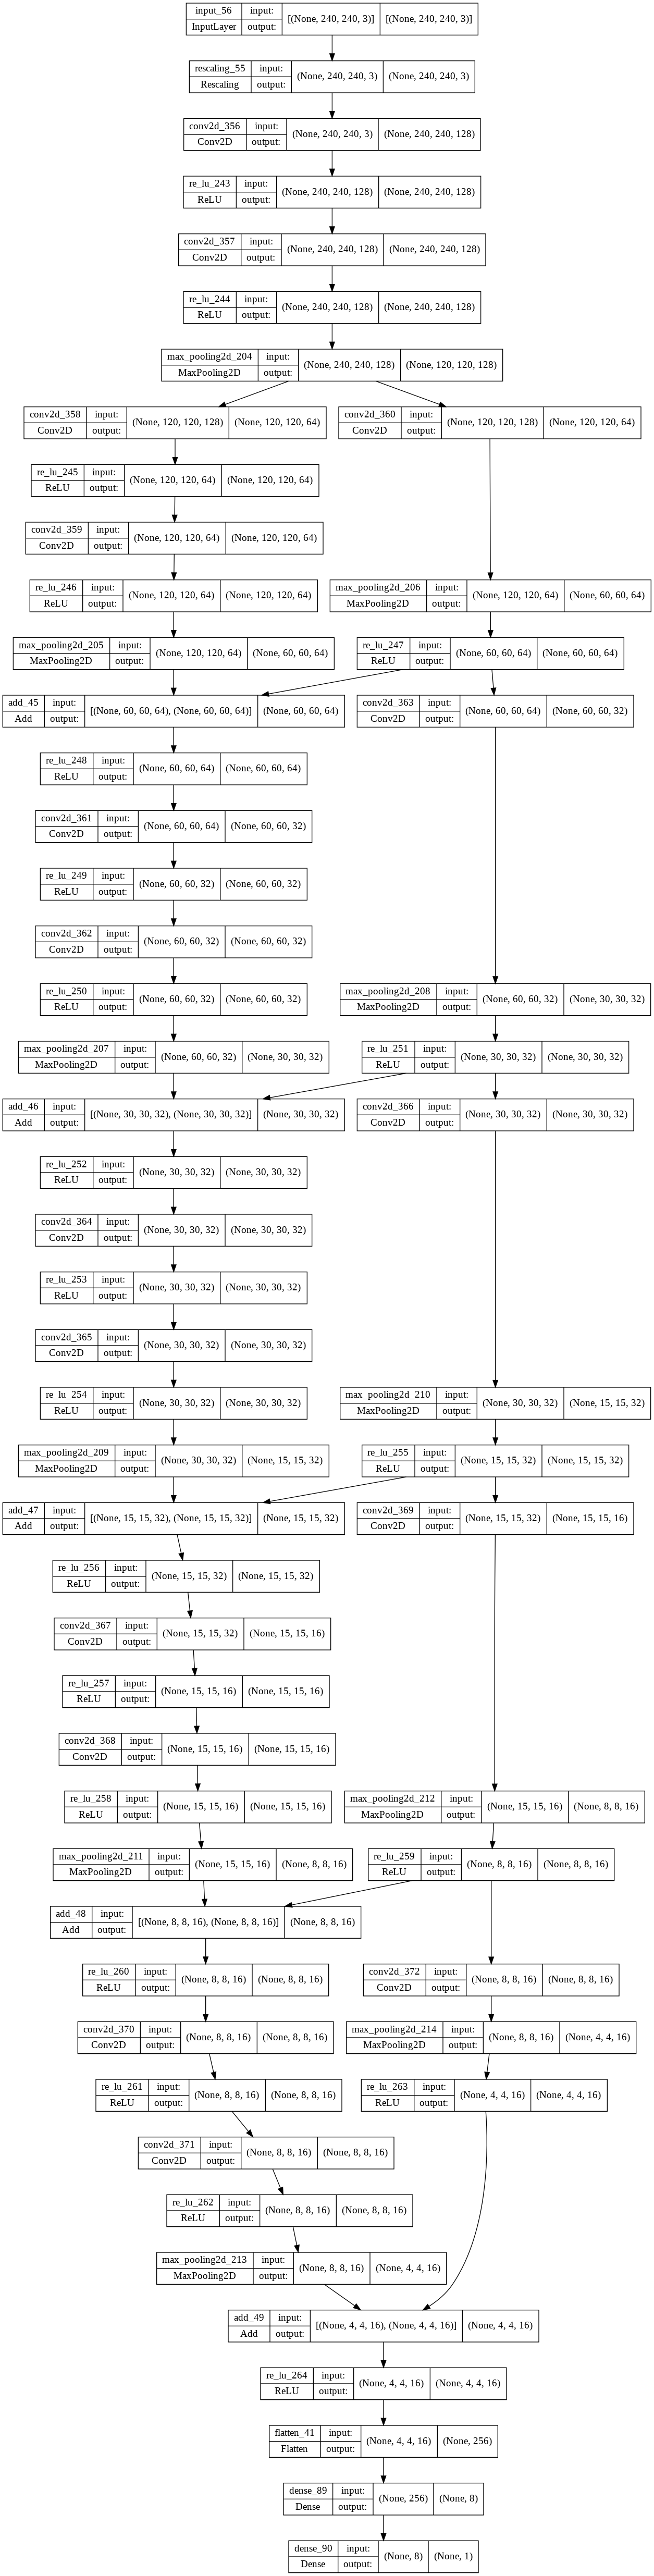

In [81]:
    
    
#now we'll create our model

#block1
input = Input( shape = (240,240,3))
x = layers.Rescaling(1./255)(input)

x = Conv2D(128, kernel_size=(3,3),padding='SAME')(x)
x = ReLU()(x)

#
x = Conv2D(128, kernel_size=(3,3),padding='SAME')(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size = 2, padding = 'SAME')(x)

tensor = x
#block2
x = Conv2D(64, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
#
x = Conv2D(64, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size = 2, padding = 'SAME')(x)

#
tensor = Conv2D(64, kernel_size=1,padding='SAME')(tensor)
tensor = MaxPooling2D(pool_size = 2, padding = 'SAME')(tensor)
tensor = ReLU()(tensor)

x = Add()([x,tensor])
x = ReLU()(x)

#block3
x = Conv2D(32, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
#
x = Conv2D(32, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size = 2, padding = 'SAME')(x)

#
tensor = Conv2D(32, kernel_size=1,padding='SAME')(tensor)
tensor = MaxPooling2D(pool_size = 2, padding = 'SAME')(tensor)
tensor = ReLU()(tensor)

x = Add()([x,tensor])
x = ReLU()(x)
#block4
x = Conv2D(32, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
#
x = Conv2D(32, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size = 2, padding = 'SAME')(x)

#
tensor = Conv2D(32, kernel_size=1,padding='SAME')(tensor)
tensor = MaxPooling2D(pool_size = 2, padding = 'SAME')(tensor)
tensor = ReLU()(tensor)

x = Add()([x,tensor])
x = ReLU()(x)
#block5
x = Conv2D(16, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
#
x = Conv2D(16, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size = 2, padding = 'SAME')(x)

#
tensor = Conv2D(16, kernel_size=1,padding='SAME')(tensor)
tensor = MaxPooling2D(pool_size = 2, padding = 'SAME')(tensor)
tensor = ReLU()(tensor)

x = Add()([x,tensor])
x = ReLU()(x)
#block6
x = Conv2D(16, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
#
x = Conv2D(16, kernel_size=(3, 3),padding='SAME')(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size = 2, padding = 'SAME')(x)

#
tensor = Conv2D(16, kernel_size=1,padding='SAME')(tensor)
tensor = MaxPooling2D(pool_size = 2, padding = 'SAME')(tensor)
tensor = ReLU()(tensor)

x = Add()([x,tensor])
x = ReLU()(x)

    #classifier
x = Flatten()(x)       
        
x = Dense (units = 8, activation = 'relu')(x)
    
output = Dense( units = 1, activation  = 'sigmoid')(x)
   
#compiling the model


model = Model(inputs = input, outputs = output)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)




In [82]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    train_ds,
    
    validation_data= val_ds,
    batch_size = 64,
    callbacks = [early_stopping],
    epochs=50,
    verbose = 1
)

Epoch 1/50
33/33 [==============================] - 31s 860ms/step - loss: 0.6722 - accuracy: 0.5878 - val_loss: 0.6770 - val_accuracy: 0.5431
Epoch 2/50
33/33 [==============================] - 29s 840ms/step - loss: 0.6245 - accuracy: 0.6766 - val_loss: 0.6014 - val_accuracy: 0.7081
Epoch 3/50
33/33 [==============================] - 30s 865ms/step - loss: 0.5600 - accuracy: 0.7096 - val_loss: 0.5969 - val_accuracy: 0.6980
Epoch 4/50
33/33 [==============================] - 30s 861ms/step - loss: 0.5424 - accuracy: 0.7191 - val_loss: 0.5559 - val_accuracy: 0.7335
Epoch 5/50
33/33 [==============================] - 30s 868ms/step - loss: 0.4924 - accuracy: 0.7647 - val_loss: 0.5174 - val_accuracy: 0.7614
Epoch 6/50
33/33 [==============================] - 30s 867ms/step - loss: 0.5072 - accuracy: 0.7603 - val_loss: 0.5425 - val_accuracy: 0.7310
Epoch 7/50
33/33 [==============================] - 30s 868ms/step - loss: 0.4702 - accuracy: 0.7819 - val_loss: 0.4873 - val_accuracy: 0.7741

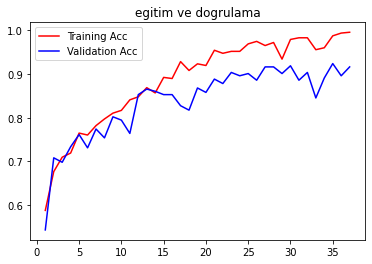

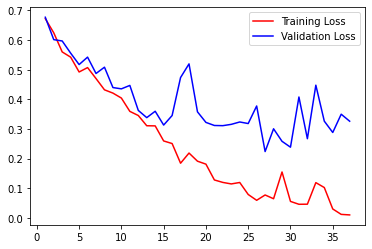

<Figure size 432x288 with 0 Axes>

In [87]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'b',color = 'red',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title('egitim ve dogrulama')
plt.legend()
plt.figure()
#
plt.plot(epochs,loss,'b',color = 'red',label='Training Loss ')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.legend()
plt.figure()

plt.show()